# Problem Definition :
- The datasets "accounts.csv" and "transactions.csv" presents loan services details to the customers.
- The ﬁrm is interested in giving additional loans to its existing customers.
- You need to develop a machine learning model for identifying the potential customers. Potential customers are those who may opt for top up loan services in future.

# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_trasactions=pd.read_csv('transaction.csv')

In [3]:
df_accounts=pd.read_csv('accounts.csv')

In [4]:
df_accounts.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,Account,AGE,MonthlyIncome,beneficiary,City,State,Region,ZiPCODE,Top-up Month,Feedback
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,...,SELF,49.0,35833.33,Parents,RAISEN,MADHYA PRADESH,EAST,464993.0,> 48 Months,Yes
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,...,SELF,23.0,666.67,Parents,SEHORE,MADHYA PRADESH,EAST,466001.0,No Top-up Service,Yes
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,...,SELF,39.0,45257.00,Parents,BHOPAL,MADHYA PRADESH,EAST,462030.0,12-18 Months,Yes
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,...,SELF,24.0,20833.33,Parents,ASHOK NAGAR,MADHYA PRADESH,EAST,473335.0,> 48 Months,Yes
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,...,SELF,56.0,27313.67,Stranger,BILASPUR,CHATTISGARH,EAST,495442.0,36-48 Months,Not Interested


In [5]:
df_trasactions.head()

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,...,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,1,False,PRIMARY,Overdraft,NAB,2018-04-30,Individual,Delinquent,2015-10-05,NaN,...,NaN,"37,873",0.0,Standard,"20180430,20180331,",030000,"37873,12820,","37873,,",",,",NaN
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31,Individual,Active,2018-03-19,NaN,...,F03,NaN,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",0000000000000000000000000000000000000000000000...,"20797,21988,23174,24341,25504,26648,27780,2891...",",,,,,,,,,,,,,,,,,,,,1452,,",",,,,,,,,,,,,,,,,,,,,,,",36.0
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2019-08-30,NaN,...,NaN,0,0.0,NaN,"20200131,20191231,20191130,20191031,20190930,2...",000000000000000000,"116087,116087,145000,145000,145000,145000,","0,0,0,0,0,0,",",,,,,,",NaN
3,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30,Individual,Closed,2013-09-27,2017-09-21 00:00:00,...,NaN,0,0.0,NaN,"20170930,20170801,20170731,20170630,20170531,2...",000DDD0270260270260270240270270000320000000000...,"0,,15925,23754,31494,39147,46713,54194,61590,6...","0,,1014,1014,1014,1014,1014,1014,1014,983,0,92...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,1,True,PRIMARY,Tractor Loan,NBF,2016-02-29,Individual,Closed,2012-02-10,2016-02-01 00:00:00,...,NaN,0,0.0,NaN,"20160229,20160131,20151231,20151130,20151031,2...",0000000000000000000000000000000000000000000000...,"0,0,23658,23321,22989,46321,45662,45012,68030,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN


# Data Preprocessing

In [6]:
df_accounts.isna().sum()

ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               11653
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
AssetID                0
ManufacturerID         0
SupplierID             0
LTV                    0
Account                0
AGE                   59
MonthlyIncome        234
beneficiary            0
City               11256
State                  0
Region                 0
ZiPCODE              372
Top-up Month           0
Feedback               0
dtype: int64

In [7]:
df_accounts.shape

(128655, 29)

In [8]:
df_trasactions.isna().sum()

ID                                0
SELF-INDICATOR                    0
MATCH-TYPE                        0
ACCT-TYPE                         0
CONTRIBUTOR-TYPE                  0
DATE-REPORTED                  3683
OWNERSHIP-IND                     0
ACCOUNT-STATUS                    0
DISBURSED-DT                  32150
CLOSE-DT                     251758
LAST-PAYMENT-DATE            319283
CREDIT-LIMIT/SANC AMT        545685
DISBURSED-AMT/HIGH CREDIT         0
INSTALLMENT-AMT              420509
CURRENT-BAL                     233
INSTALLMENT-FREQUENCY        425135
OVERDUE-AMT                  118891
WRITE-OFF-AMT                 19123
ASSET_CLASS                  300376
REPORTED DATE - HIST          19123
DPD - HIST                    19647
CUR BAL - HIST                19123
AMT OVERDUE - HIST            19123
AMT PAID - HIST               20294
TENURE                       368107
dtype: int64

In [9]:
df_trasactions.shape

(560844, 25)

In [10]:
df_trasactions.isna().sum()/df_trasactions.shape[0]*100

ID                            0.000000
SELF-INDICATOR                0.000000
MATCH-TYPE                    0.000000
ACCT-TYPE                     0.000000
CONTRIBUTOR-TYPE              0.000000
DATE-REPORTED                 0.656689
OWNERSHIP-IND                 0.000000
ACCOUNT-STATUS                0.000000
DISBURSED-DT                  5.732432
CLOSE-DT                     44.889131
LAST-PAYMENT-DATE            56.929021
CREDIT-LIMIT/SANC AMT        97.297109
DISBURSED-AMT/HIGH CREDIT     0.000000
INSTALLMENT-AMT              74.977890
CURRENT-BAL                   0.041545
INSTALLMENT-FREQUENCY        75.802719
OVERDUE-AMT                  21.198586
WRITE-OFF-AMT                 3.409683
ASSET_CLASS                  53.557852
REPORTED DATE - HIST          3.409683
DPD - HIST                    3.503113
CUR BAL - HIST                3.409683
AMT OVERDUE - HIST            3.409683
AMT PAID - HIST               3.618475
TENURE                       65.634472
dtype: float64

In [11]:
unique_id=df_trasactions['ID'].unique()

In [12]:
unique_id.shape

(128655,)

In [13]:
sac_df=df_accounts.sort_values(['ID'])
str_df=df_trasactions.sort_values(['ID'])

In [14]:
sac_df

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,Account,AGE,MonthlyIncome,beneficiary,City,State,Region,ZiPCODE,Top-up Month,Feedback
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,...,SELF,49.0,35833.33,Parents,RAISEN,MADHYA PRADESH,EAST,464993.0,> 48 Months,Yes
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,...,SELF,23.0,666.67,Parents,SEHORE,MADHYA PRADESH,EAST,466001.0,No Top-up Service,Yes
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,...,SELF,39.0,45257.00,Parents,BHOPAL,MADHYA PRADESH,EAST,462030.0,12-18 Months,Yes
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,...,SELF,24.0,20833.33,Parents,ASHOK NAGAR,MADHYA PRADESH,EAST,473335.0,> 48 Months,Yes
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,...,SELF,56.0,27313.67,Stranger,BILASPUR,CHATTISGARH,EAST,495442.0,36-48 Months,Not Interested
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128650,143390,Half Yearly,Arrear,Closed,Direct Debit,424,PANIPAT,24,470000,265601.0,...,CURRENT,25.0,65333.33,Stranger,SONIPAT,HARYANA,NORTH,131403.0,24-30 Months,Not Interested
128651,143391,Half Yearly,Arrear,Closed,Direct Debit,424,PANIPAT,24,460000,275630.0,...,CURRENT,25.0,83333.33,Stranger,SONIPAT,HARYANA,NORTH,131403.0,No Top-up Service,Not Interested
128652,143393,Monthly,Arrear,Active,Direct Debit,424,PANIPAT,23,545000,300733.0,...,CURRENT,36.0,248500.00,Stranger,SONIPAT,HARYANA,NORTH,131024.0,No Top-up Service,Not Interested
128653,143394,Half Yearly,Arrear,Active,Direct Debit,424,PANIPAT,35,350000,250962.0,...,CURRENT,37.0,84500.00,Stranger,SONIPAT,HARYANA,NORTH,131103.0,No Top-up Service,Not Interested


In [15]:
str_df

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,...,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,1,False,PRIMARY,Overdraft,NAB,2018-04-30,Individual,Delinquent,2015-10-05,NaN,...,NaN,"37,873",0.0,Standard,"20180430,20180331,",030000,"37873,12820,","37873,,",",,",NaN
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31,Individual,Active,2018-03-19,NaN,...,F03,NaN,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",0000000000000000000000000000000000000000000000...,"20797,21988,23174,24341,25504,26648,27780,2891...",",,,,,,,,,,,,,,,,,,,,1452,,",",,,,,,,,,,,,,,,,,,,,,,",36.0
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2019-08-30,NaN,...,NaN,0,0.0,NaN,"20200131,20191231,20191130,20191031,20190930,2...",000000000000000000,"116087,116087,145000,145000,145000,145000,","0,0,0,0,0,0,",",,,,,,",NaN
3,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30,Individual,Closed,2013-09-27,2017-09-21 00:00:00,...,NaN,0,0.0,NaN,"20170930,20170801,20170731,20170630,20170531,2...",000DDD0270260270260270240270270000320000000000...,"0,,15925,23754,31494,39147,46713,54194,61590,6...","0,,1014,1014,1014,1014,1014,1014,1014,983,0,92...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,1,True,PRIMARY,Tractor Loan,NBF,2016-02-29,Individual,Closed,2012-02-10,2016-02-01 00:00:00,...,NaN,0,0.0,NaN,"20160229,20160131,20151231,20151130,20151031,2...",0000000000000000000000000000000000000000000000...,"0,0,23658,23321,22989,46321,45662,45012,68030,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560839,143393,False,PRIMARY,Tractor Loan,NBF,2019-12-31,Individual,Closed,NaN,NaN,...,NaN,0,0.0,Standard,"20171231,20171130,20171001,20170930,20170831,2...",000000DDD054024024000000000000000000,"0,0,,67747,89638,111197,109562,130470,151135,1...","0,0,,22920,22920,22920,0,0,0,0,0,0",",,,,,,,,,,,,,",12.0
560840,143393,False,PRIMARY,Tractor Loan,NBF,2019-12-31,Individual,Active,2017-10-31,NaN,...,NaN,0,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",000000000000000000027028028DDD026030DDD0000000...,"0,0,14208,28265,42149,55874,69591,83001,96293,...","0,0,0,0,0,0,125,125,125,,125,125,,0,0,0,,,0,,0...",",,,,,,,,,,,,,,,,,,,,,,,,,,",24.0
560841,143393,False,PRIMARY,Auto Loan (Personal),NBF,2020-01-31,Guarantor,Active,2016-11-28,NaN,...,NaN,NaN,0.0,Standard,"20200131,20191231,20191130,20191031,20190930,2...",XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX031XXXXXX0...,"101687,111161,120514,129749,138867,147870,1567...",",,,,,,,,,,,,10897,,,10763,,10771,21785,10885,,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",48.0
560842,143394,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2018-12-20,NaN,...,NaN,0,0.0,NaN,"20200131,20191231,20191130,20191031,20190930,2...",0,"132487,132487,132487,191426,191426,191426,1914...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,",",,,,,,,,,,,,,,",NaN


In [16]:
df_accounts.iloc[:,:15]

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,10-02-2012,15-01-2016,10-02-2012
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,350000.0,10500.0,31-03-2012,15-02-2016,31-03-2012
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,519728.0,38300.0,17-06-2017,10-02-2023,17-06-2017
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,400000.0,11600.0,29-11-2013,10-11-2017,29-11-2013
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,440000.0,15000.0,08-12-2011,05-07-2015,08-12-2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128650,143390,Half Yearly,Arrear,Closed,Direct Debit,424,PANIPAT,24,470000,265601.0,265601.0,76800.0,21-09-2018,05-06-2020,22-09-2018
128651,143391,Half Yearly,Arrear,Closed,Direct Debit,424,PANIPAT,24,460000,275630.0,275630.0,80100.0,22-09-2018,05-06-2020,22-09-2018
128652,143393,Monthly,Arrear,Active,Direct Debit,424,PANIPAT,23,545000,300733.0,300733.0,15277.0,23-11-2018,05-11-2020,23-11-2018
128653,143394,Half Yearly,Arrear,Active,Direct Debit,424,PANIPAT,35,350000,250962.0,250962.0,74341.0,20-12-2018,05-06-2021,20-12-2018


In [17]:
df_accounts.iloc[:,15:]

,AssetID,ManufacturerID,SupplierID,LTV,Account,AGE,MonthlyIncome,beneficiary,City,State,Region,ZiPCODE,Top-up Month,Feedback
0,4022465,1568,21946,61.11,SELF,49.0,35833.33,Parents,RAISEN,MADHYA PRADESH,EAST,464993.0,> 48 Months,Yes
1,4681175,1062,34802,70.00,SELF,23.0,666.67,Parents,SEHORE,MADHYA PRADESH,EAST,466001.0,No Top-up Service,Yes
2,25328146,1060,127335,69.77,SELF,39.0,45257.00,Parents,BHOPAL,MADHYA PRADESH,EAST,462030.0,12-18 Months,Yes
3,13021591,1060,25094,80.92,SELF,24.0,20833.33,Parents,ASHOK NAGAR,MADHYA PRADESH,EAST,473335.0,> 48 Months,Yes
4,3291320,1046,21853,71.05,SELF,56.0,27313.67,Stranger,BILASPUR,CHATTISGARH,EAST,495442.0,36-48 Months,Not Interested
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128650,31286914,1568,48879,40.17,CURRENT,25.0,65333.33,Stranger,SONIPAT,HARYANA,NORTH,131403.0,24-30 Months,Not Interested
128651,31295422,1568,48879,59.92,CURRENT,25.0,83333.33,Stranger,SONIPAT,HARYANA,NORTH,131403.0,No Top-up Service,Not Interested
128652,32145629,1568,44118,52.38,CURRENT,36.0,248500.00,Stranger,SONIPAT,HARYANA,NORTH,131024.0,No Top-up Service,Not Interested
128653,32509866,1568,48879,50.37,CURRENT,37.0,84500.00,Stranger,SONIPAT,HARYANA,NORTH,131103.0,No Top-up Service,Not Interested


In [18]:
df_accounts['Feedback'].value_counts()

No                61490
Yes               49841
Not Interested    17324
Name: Feedback, dtype: int64

In [19]:
df_a_new=df_accounts[df_accounts['Feedback']=='Yes']

In [20]:
df_accounts[df_accounts['Feedback']=='Yes'].count

<bound method DataFrame.count of             ID    Frequency InstlmentMode LoanStatus   PaymentMode  BranchID  \
0            1      Monthly        Arrear     Closed         PDC_E         1   
1            2      Monthly       Advance     Closed           PDC       333   
2            3      Quatrly        Arrear     Active  Direct Debit         1   
3            7      Monthly       Advance     Closed        Billed       125   
104        109      Quatrly        Arrear     Closed         PDC_E       194   
...        ...          ...           ...        ...           ...       ...   
128608  143344  Half Yearly        Arrear     Closed           ECS       390   
128609  143345  Half Yearly        Arrear     Active  Direct Debit       393   
128616  143356  Half Yearly        Arrear     Active           ECS       401   
128617  143357  Half Yearly        Arrear     Active  Direct Debit       401   
128649  143389      Quatrly        Arrear     Closed  Direct Debit       416   

      

In [21]:
df_a_new.shape

(49841, 29)

In [22]:
df_a_new

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,Account,AGE,MonthlyIncome,beneficiary,City,State,Region,ZiPCODE,Top-up Month,Feedback
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,...,SELF,49.0,35833.33,Parents,RAISEN,MADHYA PRADESH,EAST,464993.0,> 48 Months,Yes
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,...,SELF,23.0,666.67,Parents,SEHORE,MADHYA PRADESH,EAST,466001.0,No Top-up Service,Yes
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,...,SELF,39.0,45257.00,Parents,BHOPAL,MADHYA PRADESH,EAST,462030.0,12-18 Months,Yes
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,...,SELF,24.0,20833.33,Parents,ASHOK NAGAR,MADHYA PRADESH,EAST,473335.0,> 48 Months,Yes
104,109,Quatrly,Arrear,Closed,PDC_E,194,CUTTACK,48,600000,436000.0,...,SELF,46.0,25000.00,Parents,GAYA,BIHAR,EAST,823001.0,No Top-up Service,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128608,143344,Half Yearly,Arrear,Closed,ECS,390,RATLAM,18,595000,300000.0,...,SELF,63.0,33333.33,Parents,RATLAM,MADHYA PRADESH,EAST,457118.0,No Top-up Service,Yes
128609,143345,Half Yearly,Arrear,Active,Direct Debit,393,BARMER,36,500000,375000.0,...,SAVING,36.0,58333.33,Parents,JALOR,RAJASTHAN,WEST,343040.0,No Top-up Service,Yes
128616,143356,Half Yearly,Arrear,Active,ECS,401,SHAHDOL,24,500000,201888.0,...,SELF,52.0,33666.67,Parents,SHAHADOL,MADHYA PRADESH,EAST,484001.0,18-24 Months,Yes
128617,143357,Half Yearly,Arrear,Active,Direct Debit,401,SHAHDOL,39,500000,265887.0,...,SELF,26.0,25333.33,Parents,SHAHADOL,MADHYA PRADESH,EAST,484001.0,18-24 Months,Yes


In [23]:
df_a_new['Feedback'].value_counts()

Yes    49841
Name: Feedback, dtype: int64

In [24]:
df_accounts[['ID','Frequency','InstlmentMode','LoanStatus','Tenure','AssetCost','AmountFinance','DisbursalAmount','EMI','DisbursalDate','LTV','AGE','MonthlyIncome','State','Region','ZiPCODE','Top-up Month','Feedback']]

,ID,Frequency,InstlmentMode,LoanStatus,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,LTV,AGE,MonthlyIncome,State,Region,ZiPCODE,Top-up Month,Feedback
0,1,Monthly,Arrear,Closed,48,450000,275000.0,275000.0,24000.0,10-02-2012,61.11,49.0,35833.33,MADHYA PRADESH,EAST,464993.0,> 48 Months,Yes
1,2,Monthly,Advance,Closed,47,485000,350000.0,350000.0,10500.0,31-03-2012,70.00,23.0,666.67,MADHYA PRADESH,EAST,466001.0,No Top-up Service,Yes
2,3,Quatrly,Arrear,Active,68,690000,519728.0,519728.0,38300.0,17-06-2017,69.77,39.0,45257.00,MADHYA PRADESH,EAST,462030.0,12-18 Months,Yes
3,7,Monthly,Advance,Closed,48,480000,400000.0,400000.0,11600.0,29-11-2013,80.92,24.0,20833.33,MADHYA PRADESH,EAST,473335.0,> 48 Months,Yes
4,8,Monthly,Arrear,Closed,44,619265,440000.0,440000.0,15000.0,08-12-2011,71.05,56.0,27313.67,CHATTISGARH,EAST,495442.0,36-48 Months,Not Interested
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128650,143390,Half Yearly,Arrear,Closed,24,470000,265601.0,265601.0,76800.0,21-09-2018,40.17,25.0,65333.33,HARYANA,NORTH,131403.0,24-30 Months,Not Interested
128651,143391,Half Yearly,Arrear,Closed,24,460000,275630.0,275630.0,80100.0,22-09-2018,59.92,25.0,83333.33,HARYANA,NORTH,131403.0,No Top-up Service,Not Interested
128652,143393,Monthly,Arrear,Active,23,545000,300733.0,300733.0,15277.0,23-11-2018,52.38,36.0,248500.00,HARYANA,NORTH,131024.0,No Top-up Service,Not Interested
128653,143394,Half Yearly,Arrear,Active,35,350000,250962.0,250962.0,74341.0,20-12-2018,50.37,37.0,84500.00,HARYANA,NORTH,131103.0,No Top-up Service,Not Interested


In [25]:
df_accounts['Target']=np.where(df_accounts['Top-up Month']=="No Top-up Service",0,1)

In [26]:
df_accounts['Target'].value_counts()/df_accounts.shape[0]*100

0    82.917104
1    17.082896
Name: Target, dtype: float64

In [27]:
df_accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128655 entries, 0 to 128654
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               128655 non-null  int64  
 1   Frequency        128655 non-null  object 
 2   InstlmentMode    128655 non-null  object 
 3   LoanStatus       128655 non-null  object 
 4   PaymentMode      128655 non-null  object 
 5   BranchID         128655 non-null  int64  
 6   Area             117002 non-null  object 
 7   Tenure           128655 non-null  int64  
 8   AssetCost        128655 non-null  int64  
 9   AmountFinance    128655 non-null  float64
 10  DisbursalAmount  128655 non-null  float64
 11  EMI              128655 non-null  float64
 12  DisbursalDate    128655 non-null  object 
 13  MaturityDAte     128654 non-null  object 
 14  AuthDate         128655 non-null  object 
 15  AssetID          128655 non-null  int64  
 16  ManufacturerID   128655 non-null  int6

In [28]:
df_accounts=df_accounts[['ID','Frequency','InstlmentMode','LoanStatus','Tenure','AssetCost','AmountFinance','DisbursalAmount','EMI','DisbursalDate','LTV','AGE','MonthlyIncome','State','Top-up Month','Feedback','Target']]

In [29]:
df_accounts

,ID,Frequency,InstlmentMode,LoanStatus,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,LTV,AGE,MonthlyIncome,State,Top-up Month,Feedback,Target
0,1,Monthly,Arrear,Closed,48,450000,275000.0,275000.0,24000.0,10-02-2012,61.11,49.0,35833.33,MADHYA PRADESH,> 48 Months,Yes,1
1,2,Monthly,Advance,Closed,47,485000,350000.0,350000.0,10500.0,31-03-2012,70.00,23.0,666.67,MADHYA PRADESH,No Top-up Service,Yes,0
2,3,Quatrly,Arrear,Active,68,690000,519728.0,519728.0,38300.0,17-06-2017,69.77,39.0,45257.00,MADHYA PRADESH,12-18 Months,Yes,1
3,7,Monthly,Advance,Closed,48,480000,400000.0,400000.0,11600.0,29-11-2013,80.92,24.0,20833.33,MADHYA PRADESH,> 48 Months,Yes,1
4,8,Monthly,Arrear,Closed,44,619265,440000.0,440000.0,15000.0,08-12-2011,71.05,56.0,27313.67,CHATTISGARH,36-48 Months,Not Interested,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128650,143390,Half Yearly,Arrear,Closed,24,470000,265601.0,265601.0,76800.0,21-09-2018,40.17,25.0,65333.33,HARYANA,24-30 Months,Not Interested,1
128651,143391,Half Yearly,Arrear,Closed,24,460000,275630.0,275630.0,80100.0,22-09-2018,59.92,25.0,83333.33,HARYANA,No Top-up Service,Not Interested,0
128652,143393,Monthly,Arrear,Active,23,545000,300733.0,300733.0,15277.0,23-11-2018,52.38,36.0,248500.00,HARYANA,No Top-up Service,Not Interested,0
128653,143394,Half Yearly,Arrear,Active,35,350000,250962.0,250962.0,74341.0,20-12-2018,50.37,37.0,84500.00,HARYANA,No Top-up Service,Not Interested,0


In [30]:
(df_accounts.isna().sum()/df_accounts.shape[0])*100

ID                 0.000000
Frequency          0.000000
InstlmentMode      0.000000
LoanStatus         0.000000
Tenure             0.000000
AssetCost          0.000000
AmountFinance      0.000000
DisbursalAmount    0.000000
EMI                0.000000
DisbursalDate      0.000000
LTV                0.000000
AGE                0.045859
MonthlyIncome      0.181882
State              0.000000
Top-up Month       0.000000
Feedback           0.000000
Target             0.000000
dtype: float64

In [31]:
age_mean=np.mean(df_accounts['AGE'])

In [32]:
df_accounts['AGE'].fillna(age_mean)

0         49.0
1         23.0
2         39.0
3         24.0
4         56.0
          ... 
128650    25.0
128651    25.0
128652    36.0
128653    37.0
128654    33.0
Name: AGE, Length: 128655, dtype: float64

In [33]:
df_accounts['AGE']=df_accounts['AGE'].round(0)

In [34]:
df_accounts

,ID,Frequency,InstlmentMode,LoanStatus,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,LTV,AGE,MonthlyIncome,State,Top-up Month,Feedback,Target
0,1,Monthly,Arrear,Closed,48,450000,275000.0,275000.0,24000.0,10-02-2012,61.11,49.0,35833.33,MADHYA PRADESH,> 48 Months,Yes,1
1,2,Monthly,Advance,Closed,47,485000,350000.0,350000.0,10500.0,31-03-2012,70.00,23.0,666.67,MADHYA PRADESH,No Top-up Service,Yes,0
2,3,Quatrly,Arrear,Active,68,690000,519728.0,519728.0,38300.0,17-06-2017,69.77,39.0,45257.00,MADHYA PRADESH,12-18 Months,Yes,1
3,7,Monthly,Advance,Closed,48,480000,400000.0,400000.0,11600.0,29-11-2013,80.92,24.0,20833.33,MADHYA PRADESH,> 48 Months,Yes,1
4,8,Monthly,Arrear,Closed,44,619265,440000.0,440000.0,15000.0,08-12-2011,71.05,56.0,27313.67,CHATTISGARH,36-48 Months,Not Interested,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128650,143390,Half Yearly,Arrear,Closed,24,470000,265601.0,265601.0,76800.0,21-09-2018,40.17,25.0,65333.33,HARYANA,24-30 Months,Not Interested,1
128651,143391,Half Yearly,Arrear,Closed,24,460000,275630.0,275630.0,80100.0,22-09-2018,59.92,25.0,83333.33,HARYANA,No Top-up Service,Not Interested,0
128652,143393,Monthly,Arrear,Active,23,545000,300733.0,300733.0,15277.0,23-11-2018,52.38,36.0,248500.00,HARYANA,No Top-up Service,Not Interested,0
128653,143394,Half Yearly,Arrear,Active,35,350000,250962.0,250962.0,74341.0,20-12-2018,50.37,37.0,84500.00,HARYANA,No Top-up Service,Not Interested,0


In [35]:
income_mean=np.mean(df_accounts['MonthlyIncome'])

In [36]:
income_mean

50323.60434087883

In [37]:
df_accounts['MonthlyIncome'].fillna(income_mean)

0          35833.33
1            666.67
2          45257.00
3          20833.33
4          27313.67
            ...    
128650     65333.33
128651     83333.33
128652    248500.00
128653     84500.00
128654    178166.67
Name: MonthlyIncome, Length: 128655, dtype: float64

In [38]:
df_accounts['MonthlyIncome']=df_accounts['MonthlyIncome'].round(0)

In [39]:
df_accounts['MonthlyIncome']

0          35833.0
1            667.0
2          45257.0
3          20833.0
4          27314.0
            ...   
128650     65333.0
128651     83333.0
128652    248500.0
128653     84500.0
128654    178167.0
Name: MonthlyIncome, Length: 128655, dtype: float64

In [40]:
df_accounts['MonthlyIncome'].describe()

count    1.284210e+05
mean     5.032361e+04
std      1.724607e+06
min      0.000000e+00
25%      2.500000e+04
50%      3.583300e+04
75%      5.000000e+04
max      6.174775e+08
Name: MonthlyIncome, dtype: float64

In [41]:
from scipy.stats import iqr
monthly_income_iqr=iqr([df_accounts['MonthlyIncome']])

In [42]:
q3 = 5.000000e+04
q1 = 2.500000e+04
iqr = q3 - q1
iqr

25000.0

In [43]:
u_limit_for_outlier = q3 + 1.5*iqr
l_limit_for_outlier = q1 - 1.5*iqr
print(u_limit_for_outlier,l_limit_for_outlier)

87500.0 -12500.0


In [44]:
df_accounts.shape

(128655, 17)

In [45]:
df_accounts.drop(df_accounts[df_accounts['MonthlyIncome']>100000].index,inplace=True)

In [46]:
df_accounts.shape

(123354, 17)

[]

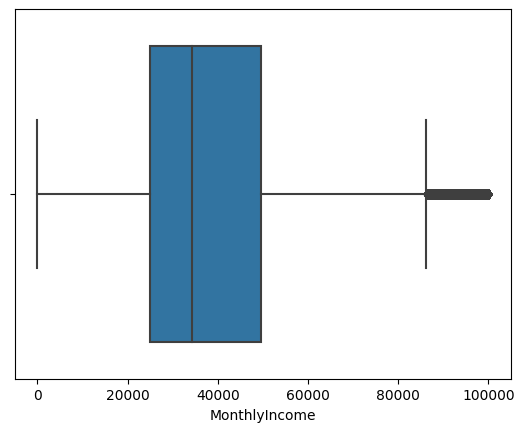

In [47]:
sns.boxplot(x=df_accounts['MonthlyIncome'])
plt.plot()

In [48]:
df_accounts.drop(df_accounts[df_accounts['MonthlyIncome']>90000].index,inplace=True)

[]

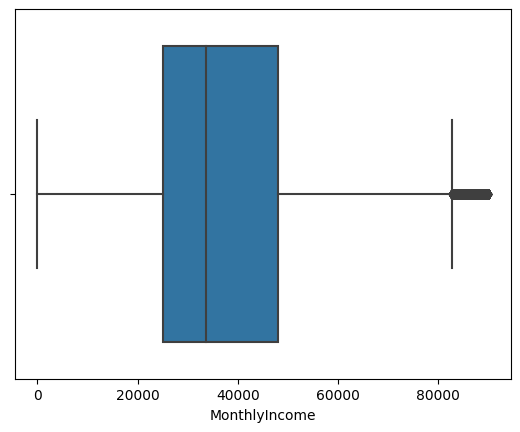

In [49]:
sns.boxplot(x=df_accounts['MonthlyIncome'])
plt.plot()

In [50]:
df_accounts.shape

(121643, 17)

In [51]:
df_accounts.drop(df_accounts[df_accounts['MonthlyIncome']>87500].index,inplace=True)

In [52]:
df_accounts.shape

(121272, 17)

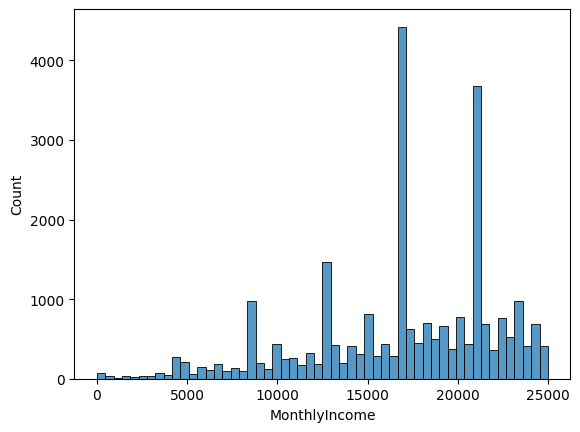

In [53]:
x = df_accounts[df_accounts['MonthlyIncome']<25000]
x = x[x['MonthlyIncome']>0]
sns.histplot(x['MonthlyIncome'])
plt.show()

In [54]:
df_accounts['loan_status']=np.where(df_accounts['LoanStatus']=='Active',0,1)

In [55]:
df_accounts

,ID,Frequency,InstlmentMode,LoanStatus,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,LTV,AGE,MonthlyIncome,State,Top-up Month,Feedback,Target,loan_status
0,1,Monthly,Arrear,Closed,48,450000,275000.0,275000.0,24000.0,10-02-2012,61.11,49.0,35833.0,MADHYA PRADESH,> 48 Months,Yes,1,1
1,2,Monthly,Advance,Closed,47,485000,350000.0,350000.0,10500.0,31-03-2012,70.00,23.0,667.0,MADHYA PRADESH,No Top-up Service,Yes,0,1
2,3,Quatrly,Arrear,Active,68,690000,519728.0,519728.0,38300.0,17-06-2017,69.77,39.0,45257.0,MADHYA PRADESH,12-18 Months,Yes,1,0
3,7,Monthly,Advance,Closed,48,480000,400000.0,400000.0,11600.0,29-11-2013,80.92,24.0,20833.0,MADHYA PRADESH,> 48 Months,Yes,1,1
4,8,Monthly,Arrear,Closed,44,619265,440000.0,440000.0,15000.0,08-12-2011,71.05,56.0,27314.0,CHATTISGARH,36-48 Months,Not Interested,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128648,143388,Quatrly,Arrear,Active,24,350000,200000.0,200000.0,29217.0,30-01-2019,57.14,51.0,34150.0,HARYANA,18-24 Months,Not Interested,1,0
128649,143389,Quatrly,Arrear,Closed,12,650000,200000.0,200000.0,54370.0,18-01-2019,30.77,39.0,69083.0,MADHYA PRADESH,18-24 Months,Yes,1,1
128650,143390,Half Yearly,Arrear,Closed,24,470000,265601.0,265601.0,76800.0,21-09-2018,40.17,25.0,65333.0,HARYANA,24-30 Months,Not Interested,1,1
128651,143391,Half Yearly,Arrear,Closed,24,460000,275630.0,275630.0,80100.0,22-09-2018,59.92,25.0,83333.0,HARYANA,No Top-up Service,Not Interested,0,1


In [56]:
#df_accounts['capable1']=np.where(df_accounts['MonthlyIncome']*0.25>=df_accounts['EMI'] and df_accounts["LoanStatus"]=="Active",1,0)

In [57]:
#df_accounts['capable1'].value_counts()

KeyError: 'capable1'

In [ ]:
df_accounts

In [ ]:
#df_accounts['capable']=np.where(df_accounts['MonthlyIncome']*0.5>=df_accounts['EMI'],1,0)

In [ ]:
df_accounts['Frequency'].value_counts()

In [ ]:
#df_accounts['new_emi']=df_accounts['Frequency'].map({'Half Yearly':df_accounts['EMI']/6,'Quatrly':df_accounts['EMI']/3,'BI-Monthly':df_accounts['EMI']*2,'Monthly':df_accounts['EMI']})

In [ ]:
df_accounts['new_emi1']=np.where(df_accounts['Frequency']=='Half Yearly',df_accounts['EMI']/6,df_accounts['EMI'])

In [ ]:
df_accounts

In [ ]:
df_accounts['new_emi1']=np.where(df_accounts['Frequency']=='Quatrly',df_accounts['EMI']/3,df_accounts['new_emi1'])

In [ ]:
df_accounts['new_emi1']=np.where(df_accounts['Frequency']=='BI-Monthly',df_accounts['EMI']*2,df_accounts['new_emi1'])

In [ ]:
df_accounts

In [ ]:
df_accounts['capable1']=np.where(df_accounts["LoanStatus"]=="Closed",1,0)

In [ ]:
df_accounts

In [ ]:
#df_accounts['capable1']=np.where((df_accounts['MonthlyIncome']*0.25>=df_accounts['new_emi1']) and (df_accounts["LoanStatus"]=="Active"),1,0)

In [ ]:
df_accounts['capable1'] = np.where((df_accounts['MonthlyIncome'] * 0.25 >= df_accounts['new_emi1']) & (df_accounts["LoanStatus"] == "Active"), 1, df_accounts['capable1'])


In [ ]:
df_accounts

In [ ]:
df_accounts['capable1'].value_counts()

In [ ]:
df_accounts.drop(['loan_status','new_emi'],axis=1,inplace=True)

In [ ]:
df_accounts

In [ ]:
df_accounts.AGE.describe()

In [ ]:
q3 = 49.000000
q1 = 31.000000
iqr = q3 - q1
iqr

In [ ]:
u_limit_for_outlier = q3 + 1.5*iqr
l_limit_for_outlier = q1 - 1.5*iqr
print(u_limit_for_outlier,l_limit_for_outlier)

In [ ]:
sns.boxplot(x= df_accounts['AGE'])
plt.show()

In [ ]:
df_accounts = df_accounts[df_accounts['AGE']<u_limit_for_outlier]

In [ ]:
sns.boxplot(x= df_accounts['AGE'])
plt.show()

In [ ]:
df_accounts.shape

In [ ]:
df_accounts.to_csv("final_accounts")

In [58]:
df_accounts

,ID,Frequency,InstlmentMode,LoanStatus,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,LTV,AGE,MonthlyIncome,State,Top-up Month,Feedback,Target,loan_status
0,1,Monthly,Arrear,Closed,48,450000,275000.0,275000.0,24000.0,10-02-2012,61.11,49.0,35833.0,MADHYA PRADESH,> 48 Months,Yes,1,1
1,2,Monthly,Advance,Closed,47,485000,350000.0,350000.0,10500.0,31-03-2012,70.00,23.0,667.0,MADHYA PRADESH,No Top-up Service,Yes,0,1
2,3,Quatrly,Arrear,Active,68,690000,519728.0,519728.0,38300.0,17-06-2017,69.77,39.0,45257.0,MADHYA PRADESH,12-18 Months,Yes,1,0
3,7,Monthly,Advance,Closed,48,480000,400000.0,400000.0,11600.0,29-11-2013,80.92,24.0,20833.0,MADHYA PRADESH,> 48 Months,Yes,1,1
4,8,Monthly,Arrear,Closed,44,619265,440000.0,440000.0,15000.0,08-12-2011,71.05,56.0,27314.0,CHATTISGARH,36-48 Months,Not Interested,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128648,143388,Quatrly,Arrear,Active,24,350000,200000.0,200000.0,29217.0,30-01-2019,57.14,51.0,34150.0,HARYANA,18-24 Months,Not Interested,1,0
128649,143389,Quatrly,Arrear,Closed,12,650000,200000.0,200000.0,54370.0,18-01-2019,30.77,39.0,69083.0,MADHYA PRADESH,18-24 Months,Yes,1,1
128650,143390,Half Yearly,Arrear,Closed,24,470000,265601.0,265601.0,76800.0,21-09-2018,40.17,25.0,65333.0,HARYANA,24-30 Months,Not Interested,1,1
128651,143391,Half Yearly,Arrear,Closed,24,460000,275630.0,275630.0,80100.0,22-09-2018,59.92,25.0,83333.0,HARYANA,No Top-up Service,Not Interested,0,1
